<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP2/7506R_TP2_GRUPO24_BAYES_NAIVE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

  ➢ Torraca Lautaro - 108813

  ➢ Negrotti Gianluca - 108184

  ➢ Marco Tosi - 107237

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords




In [2]:

url_train = '/content/train_limpio.csv'
url_test = '/content/test_limpio.csv'

train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

In [3]:
test['review_es_clean'].fillna("negativo", inplace=True)
train.dropna(inplace = True)

In [4]:
# Constantes
SEED=24
JOBS=-2

In [5]:
train.head()

,ID,review_es_clean,sentimiento
0,0,critico mencionado despu ver solo oz episodio ...,positivo
1,1,pequén pequén tecnico filmacion incuestionable...,positivo
2,2,pense manera maravilloso pasar tiempo fin sema...,positivo
3,3,basicamente familia nino pequeno jake pensar z...,negativo
4,4,amor tiempo petter mattei pelicular visualment...,positivo


In [6]:
test.head()

,ID,review_es_clean
0,60000,mayor virtud peliculo hecho poder jugar topico...
1,60001,experto cinefilo poco vez habia tanto juego sa...
2,60002,si incondicional humor estilo tele termina cap...
3,60003,pasar si gente dejar llevar moda si verdad gus...
4,60004,amanecer quedo solo siento fondoun mar vacio s...


In [7]:
test.isna().sum()

ID                 0
review_es_clean    0
dtype: int64

### Bayes Naive

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Matriz de confusión:


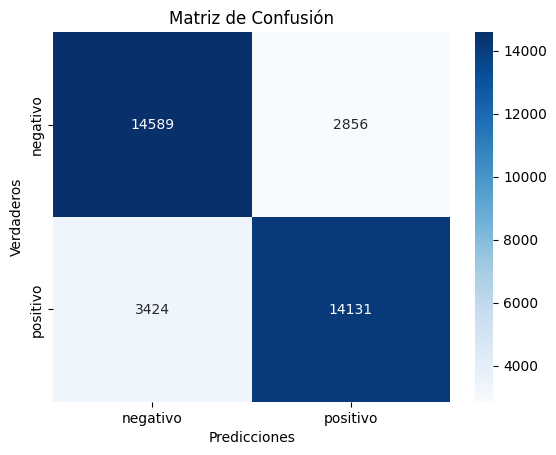


Reporte de clasificación:
              precision    recall  f1-score   support

    negativo       0.81      0.84      0.82     17445
    positivo       0.83      0.80      0.82     17555

    accuracy                           0.82     35000
   macro avg       0.82      0.82      0.82     35000
weighted avg       0.82      0.82      0.82     35000

Accuracy: 0.8206
Precision: 0.8319
Recall: 0.8050
F1 Score: 0.8182


In [8]:


# Descargar stopwords de NLTK
nltk.download('stopwords')

# Cargar stopwords en español
spanish_stopwords = stopwords.words('spanish')


# Convertir etiquetas a numéricas
label_encoder = LabelEncoder()
train['sentimiento'] = label_encoder.fit_transform(train['sentimiento'])

# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(
    train['review_es_clean'], train['sentimiento'], test_size=0.7, random_state=SEED)

# Crear un pipeline que vectorice los datos y luego aplique Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(stop_words=spanish_stopwords, max_features=5000),
    MultinomialNB()
)

# Entrenar el clasificador
pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.title('Matriz de Confusión')
plt.show()

# Calcular métricas de evaluación
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nReporte de clasificación:")
print(report)

# Imprimir métricas individuales
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


In [9]:
test_predictions = pipeline.predict(test['review_es_clean'])



output = pd.DataFrame(zip(test["ID"], label_encoder.inverse_transform(test_predictions)),columns = ['ID','sentimiento'])

output.to_csv('predicciones_test.csv', index=False)

# Descargar el archivo de predicciones (esto funcionará en entornos como Jupyter o Google Colab)
try:
    from google.colab import files
    files.download('predicciones_test.csv')
except ImportError:
    print("La función de descarga solo funciona en entornos como Google Colab.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>